In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
# bring the dataset
football = pd.read_csv('Predicted_values_FPPG.csv')
football.head()

,Unnamed: 0,Name,ID,Team,Position,GP,ATT(PASS)/G,ATT(RUN)/G,ATT(REC)/G,YDS(PASS)/G,...,ATT(RUN),ATT(REC),YDS(PASS),YDS(RUN),YDS(REC),TD(PASS),TD(RUN),TD(REC),Year,Predicted_Values_FPPG
0,0,Patrick Mahomes,1,KC,QB,16,36.3,3.8,0.0,319.0,...,60,0,5097,272,0,50,2,0,2018,13.598308
1,1,Matt Ryan,2,ATL,QB,16,38.0,2.1,0.0,308.0,...,33,0,4924,125,0,35,3,0,2018,13.580363
2,2,Ben Roethlisberger,3,PIT,QB,16,42.2,1.9,0.0,321.0,...,31,0,5129,98,0,34,3,0,2018,13.562417
3,3,Ryan Fitzpatrick,4,WAS,QB,8,30.8,4.5,0.0,296.0,...,36,0,2366,152,0,17,2,0,2018,13.544471
4,4,Drew Brees,5,NO,QB,15,32.6,2.1,0.0,266.0,...,31,0,3992,22,0,32,4,0,2018,13.526526


In [38]:
# we assing the data to x and y
X = football["ID"].values.reshape(-1, 1)
y = football["FPTS"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1391, 1) (1391, 1)


Text(0, 0.5, 'FPTS')

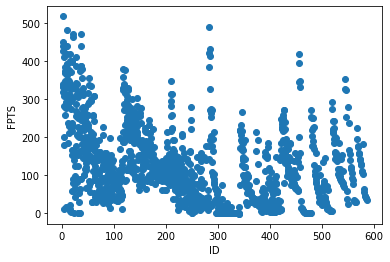

In [39]:
# we will plot the data to see if a linear trend exists
plt.scatter(X, y)
plt.xlabel("ID")
plt.ylabel("FPTS")

In [40]:
# we will split the data into training and testing
from sklearn.model_selection import train_test_split

# begin solution
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
# create the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [42]:
# we will fit the model
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# we will calculate mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# using the model to make predictions
predicted = model.predict(X_test)

# score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 8315.304281686644
R-squared (R2 ): 0.11254333779205816


In [44]:
# call the score methon on the model to show the r2 score
model.score(X_test, y_test)

0.11254333779205816

<function matplotlib.pyplot.show(close=None, block=None)>

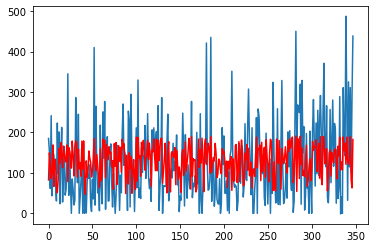

In [45]:
plt.plot(y_test)
plt.plot(predicted, color = 'red')
plt.show

In [46]:
##
##Making the new predicted values with 100% of the data
##

In [47]:
# create the model to get values for all IDs
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression()

In [48]:
# we will fit the model
model_2.fit(X, y)

LinearRegression()

In [49]:
# we will calculate mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# using the model to make predictions
predicted_2 = model_2.predict(X)

# score the predictions with mse and r2
mse = mean_squared_error(y, predicted_2)
r2 = r2_score(y, predicted_2)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 8639.17364292837
R-squared (R2 ): 0.14473286065592117


In [50]:
# call the score methon on the model to show the r2 score
model_2.score(X, y)

0.14473286065592117

In [51]:
# we want to look at our array
predicted_2

array([[187.71298767],
       [187.47316902],
       [187.23335037],
       ...,
       [120.56376647],
       [ 47.41907911],
       [ 88.42806776]])

In [52]:
# we will put the array into a dataframe
df = pd.DataFrame(predicted_2, 
             columns=['Predicted_Values_FPTS'])

In [53]:
# let us see the dataframe
df

,Predicted_Values_FPTS
0,187.712988
1,187.473169
2,187.233350
3,186.993532
4,186.753713
...,...
1386,126.079595
1387,47.658898
1388,120.563766
1389,47.419079


In [54]:
# we want to only have the numeric values
only_values = df['Predicted_Values_FPTS']
only_values

0       187.712988
1       187.473169
2       187.233350
3       186.993532
4       186.753713
           ...    
1386    126.079595
1387     47.658898
1388    120.563766
1389     47.419079
1390     88.428068
Name: Predicted_Values_FPTS, Length: 1391, dtype: float64

In [55]:
# let us merge the dataframes by index
Final_data = pd.merge(football,only_values , left_index=True, right_index=True)

In [56]:
Final_data.to_csv('Predicted_values_FPPG_+_FPTS.csv')